In [15]:
import pandas as pd
import numpy as np

from konlpy.tag import Kkma, Komoran, Okt, Hannanum
import os
import re

In [16]:
def clean_str(text):
    text = str(text)
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl='', string=text)

    text = re.sub('\n', '.', string=text)

    pattern = '[^\w\s\n?0-9]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    text = re.sub('[-=+,#/\:^$@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]','', string=text)
    
    text = text.strip()
    text = text.replace('    ', ' ')
    text = text.replace('   ', ' ')
    text = text.replace('  ', ' ')
    
    
    # for n in prod_name:
    #     text = text.replace(n, '')

    # pattern_punctuation = re.compile(r'[^\w\s]')
    # text = pattern_punctuation.sub('', text)
    return text 

In [17]:
def make_review(test,prod_name):
    okt = Okt()
    new_review = []
    for review in test:
        text = clean_str(review)
        for name in prod_name:
            text = text.replace(name, "")
        

        text = text.replace("  ", " ")
        test2 = text.split(' ')
#         text2 = [t for t in test2 if t not in prod_name]

        test2 = " ".join(test2)
        test2 = okt.morphs(test2, stem= True)

        # 조사
        stopwords1 = ['도', '만', '을', '를', '이', '가', '은', '는', 'null']
        # 지시대명사
        stopwords2 = ['이', '그', '저', 'null']
        # 그 외
        stopwords3 = ['등', '편', '번', '시', '나', '씩', '꼭', 
                      '으로', '로', '걸', '하다', '수', '와', '과', 
                      '들', '니', '또', '면', '구', '요', '것', '분', '해', '땐', '?', '건', 
                      '순', '때', '제', '에', 'null', '입니다']
        
        test2 = [t for t in test2 if t not in stopwords1]
        test2 = [t for t in test2 if t not in stopwords2]
        test2 = [t for t in test2 if t not in stopwords3]
        
        test2 = [t for t in test2 if t not in prod_name]
        
#         test3 = []
#         while len(prod_name)>0:
#             stop = prod_name.pop(0)
# #             print(stop)
#             for word in test2:
#                 if word not in stop:
# #                     print(stop, word)
#                     test3.append(word)
# #                     print(test3)
#             test2 = test3
#             test3 = []

        new_review.append(test2)
    return new_review

In [21]:
dir = '/content/drive/MyDrive/텍스트분석2023/noevinue_raw'
files = os.listdir(dir)
print(len(files)) ## 총 162개 상품
review_num = []
for file in files:
    df = pd.read_excel(dir+'/'+file)
    # print(dir+'/'+file)
    review_num.append(df.shape[0])

162


In [23]:
## 분위수 값 직접 계산
t = sorted(list(review_num))
# print(sort_num)
q1_index = int(len(t) * 0.25)
q2_index = int(len(t) * 0.5)
q3_index = int(len(t) * 0.75)

q1 = t[q1_index - 1]
q2 = t[q2_index - 1]
q3 = t[q3_index - 1]

IQR = q3 - q1

max_standard = q3 + (1.5 * IQR)
min_standard = q1 - (1.5 * IQR)

print('q1, q2, q3: ',q1,q2,q3)
print('max, min: ',max_standard, min_standard)
# max_value = max(tips[tips['total_bill'] <= max_standard]['total_bill'])
# min_value = min(tips[tips['total_bill'] >= min_standard]['total_bill'])

q1, q2, q3:  64 108 158
max, min:  299.0 -77.0


In [25]:
dir = '/content/drive/MyDrive/텍스트분석2023/noevinue_raw'
files = os.listdir(dir)
# print(len(files)) ## 총 202개 리뷰
result = []
res_file= []
for file in files:
    df = pd.read_excel(dir+'/'+file)
    # print(dir+'/'+file)
    if df.shape[0]>=10:
        result.append(df.shape[0])
        res_file.append(dir+'/'+file)

# print(sorted(result), len(result))
# print(res_file)

In [26]:
import random

In [27]:
# 상품 랜덤으로 뽑기
# dir = './NoEvi/'
# files = os.listdir(dir)
random.seed(100)
rand1 = random.sample(range(0,len(res_file)), 105)
print(rand1)
print()

new_file = []
for i in rand1:
    new_file.append(res_file[i])
# print(new_file)

[37, 117, 116, 44, 100, 89, 110, 129, 28, 136, 31, 20, 155, 67, 12, 52, 85, 58, 79, 142, 45, 36, 48, 88, 94, 104, 53, 103, 118, 70, 96, 146, 109, 83, 81, 15, 23, 0, 77, 50, 18, 99, 108, 72, 126, 24, 21, 107, 3, 141, 30, 57, 102, 123, 49, 16, 139, 128, 127, 6, 119, 147, 91, 101, 64, 95, 157, 134, 75, 43, 144, 90, 69, 46, 61, 51, 7, 143, 38, 55, 32, 151, 78, 65, 63, 97, 156, 132, 41, 111, 98, 35, 122, 87, 149, 56, 19, 33, 39, 13, 115, 82, 47, 84, 148]



In [37]:
new_file = ['/content/drive/MyDrive/텍스트분석2023/noevinue_raw/달바 워터풀 에센스 선크림 SPF50+ PA++++ 50ml + 워터풀 톤업 선크림 SPF50+ PA++++ 50ml + 기프트백, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/웰라쥬 리얼 히알루로닉 블루 앰플, 100ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/원씽 병풀 추출물, 150ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/동국제약 시즌6 호랑이 병풀 에디션 센텔리안24 더 마데카 크림, 50ml, 3개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에뛰드 순정 디렉터 수분 선크림 SPF50+ PA++++, 1개, 50ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/아로마티카 수딩 알로에 베라 젤, 500ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에스트라 아토베리어365 하이드로 에센스, 150ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/이지덤 퀵카밍, 4개입, 3개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터지 레드 블레미쉬 시카 수딩 토너 200ml + 에센스 플루이드 150ml 세트, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/참존 탑클래스 더 콜라겐 스페셜 스킨케어 4종 세트, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터지 로얄 블랙 스네일 크림 50ml + 15ml + 15ml, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터오라클 터핀아크 스팟패치 92매, 92개입, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/헤라 UV프로텍터 톤업 선크림 SPF50+ PA++++, 50ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/메디큐브 레드 이레이징 크림, 100ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/가히 멀티밤 리필형 본품 9g 1개+리필 1개 세트, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/라운드랩 독도 토너 200ml + 로션 200ml 세트, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/셀퓨전씨 레이저 썬스크린 100 SPF50+ PA+++, 45ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/리에노]장윤정의 선택_온가족 빅선쿠션 25g 본품으로만 5개, 리에노 선쿠션 5개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/설화수 자음 2종 세트 2022년 최신제품 선물포장가능, 단품, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/토니모리 바이탈 비타12 보송 선스틱 SPF50+ PA++++, 22g, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/듀이트리 AC 컨트롤 EX 딥마스크, 1개입, 10개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/달바 시즌4 화이트 트러플 프라임 인텐시브세럼 100ml x 2개+50ml x 1개, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/라비엘 아세로라 잡티 앤 기미 케어크림, 1개, 50ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/싸이닉 엔조이 슈퍼 마일드 선 에센스 SPF50+ PA++++, 50ml, 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/아이오페 히아루로닉 크림 50ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에스네이처 아쿠아 오아시스 토너, 300ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/라운드랩 독도 토너, 500ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에스네이처 아쿠아 스쿠알란 수분크림, 60ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/은율 내츄럴 알로에 마스크팩, 1개입, 50개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/메디힐 더블 카밍 워터 마스크 10p +히알루 모이스트 에센스 마스크 10p +펩타 리프팅 앰플 마스크 10p, 10개입, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/아크로패스 대용량 패치 24p + 스킨 클렌저 12p 세트, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/토리든 다이브인 데일리 무기자차 선크림 SPF50+ PA++++, 60ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에스트라 아토베리어365 크림 플러스, 90ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/센텔리안24 마데카 멜라 캡처 스틱, 10g, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/성분에디터 그린토마토 포어 리프팅 앰플 플러스 30ml 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/김정문알로에 큐어 플러스 크림 80g x 2p + 큐어2X 미니 3.5g x 2p + 클렌저 2ml x 3p 세트, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터지 그린 마일드 업 선 플러스 SPF50+ PA++++ 35ml x 2p, 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/A.H.C 프리미엄바이탈골든콜라겐크림, 50g, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/본트리 베리 에센스 선블럭 SPF50+ PA++++, 50ml, 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/라운드랩 1025 독도 토너, 200ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터아토 쿨링 선 스프레이 SPF50+ PA+++, 1개, 150ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에뛰드 순정 디렉터 수분 선크림 SPF50+ PA++++ 50ml + 20ml 기획세트, 70ml, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에스트라 아토베리어365 크림 스페셜 2종 세트, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/미샤 글로우 스킨밤, 50ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/이니스프리 톤업 노세범 선스크린 SPF50+ PA++++, 50ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터지 그린 마일드 업 선 플러스 SPF50+ PA++++, 35ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터자르트 시카페어 데이크림, 50ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에스트라 아토베리어 365 로션 플러스, 1개, 180ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/AHC 더블쉴드 선스틱 SPF50+ PA++++ 14g x 3p + 선크림 50ml 세트, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/키오스킨 보톡스 멀티밤 12g, 5개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터지 레드 블레미쉬 클리어 크림, 70ml, 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/록키스 베리 굿 선스틱 SPF50+ PA++++, 15g, 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에센허브 티트리 100 오일, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/이니스프리 비자 트러블 로션, 1개, 100ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/라운드랩 1025 독도 선크림 SPF50+ PA++++, 2개, 35ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/김정문알로에 큐어 하이드라 수딩 토너, 130ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/코멧 하이드로콜로이드 스팟패치 원형, 120매입, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/이니스프리 히알루론 수분 선크림 SPF50+ PA++++, 50ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/이니스프리 한란 스킨, 1개, 200ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/AHC 슈프림 리얼 포 페이스 아이크림, 30ml, 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/이니스프리 그린티 씨드 세럼, 1개, 80ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/토리든 다이브인 저분자 히알루론산 마스크 27ml, 1개입, 10개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/아브카 홀인원 자외선 차단 골프 선패치 17.5g, 5개입, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에뛰드 진저슈가 오버나이트 립 마스크 23g, 1개입, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/마몽드 로즈워터 토너, 1개, 500ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/아크네스 퍼펙트 솔루션 스팟 패치, 1개, 120개입.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/홀리카홀리카 알로에 워터프루프 선크림 SPF 50+ PA++++, 70ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/참존 뉴 콘트롤 크림세트, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/미샤 프리미엄 시카 알로에 수딩젤, 300ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/동국제약 센텔리안 24 엑스퍼트 마데카 멜라캡처 기미앰플 프로 시즌3 10ml x8, 8개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/토니모리 원더 세라마이드 모찌 토너, 500ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/아벤느 오떼르말 미스트 150ml + 50ml, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/메디플라워 모델링 팩 쿨, 1개입, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/라네즈 립 슬리핑 마스크 베리, 20g, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/마녀공장 비피다 바이옴 앰플 토너, 500ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/라운드랩 독도 로션, 200ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/AHC 프리미어 앰플 인 아이크림 시즌11 12ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/토니모리 알로에 99프로 촉촉수딩젤, 250ml, 3개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/달바 워터풀 에센스 선크림 SPF50+ PA++++, 35ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/라운드랩 자작나무 수분 선 크림 50ml 1+1 (SPF 50+ PA++++), 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터지 브라이트닝 업 선 플러스 SPF50+ PA+++, 1개, 35ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/편강율 진정 클리어 스팟패치, 72개, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/브링그린 티트리 시카 수딩 토너 510ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/맑을담 히알루론산 1% 고분자 액상, 100ml, 2개입.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/마르시끄 링클 리페어 미간 투명 패치 주름 개선 기능성, 1개, 5매.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/아크로패스 큐어 6p, 6개입, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/헤라 선 메이트 레포츠 선크림 SPF50+ PA++++, 70ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/일리윤 저자극 이지워시 선크림 SPF50+ PA++++, 150ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/달바 화이트 트러플 프라임 인텐시브 세럼 50ml 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/에어뮤즈 멜라이드 아이패치 스탠다드 2p, 1개, 10개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/애터미 선크림 베이지 SPF50+ PA+++, 60ml, 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터지 블랙 스네일 크림, 50ml, 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/이니스프리 레티놀 시카 흔적 앰플, 1개, 50ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/시드물 오리지널 웰빙 녹차 스킨, 150ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/토리든 다이브인 저분자 히알루론산 크림, 80ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/로로스키니 하이드로겔 턱 마스크 패치, 상세정보참조, 10개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터에이지 시카 리페어크림, 50ml, 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/닥터지 블랙 스네일 크림 50ml, 2개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/달바 워터풀 톤업 선크림 SPF 50+ PA++++ 50ml x 2p + 약산성 젤클렌저 15ml 세트, 1세트.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/김정문알로에 라 센스 로에 큐어 워터 스플래쉬 쿨링 선스틱 SPF50+ PA++++, 1개, 23g.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/올리브영 케어플러스 상처커버 스팟 패치, 102개입, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/센텔리안24 마데카 마이크로 스타톡 세럼, 50ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/라로슈포제 NEW 시카플라스트 밤 B5+ 크림, 40ml, 1개.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/센텔리안24 시즌 6 더 마데카 크림, 4개, 50ml.xlsx',
 '/content/drive/MyDrive/텍스트분석2023/noevinue_raw/토리든 다이브인 저분자 히알루론산 수딩 크림, 100ml, 1개.xlsx']

In [45]:
new_df = pd.read_excel('/content/drive/MyDrive/텍스트분석2023/merge_data/NoEvinue.xlsx')
new_df.drop(labels="Unnamed: 0", axis=1)

,리뷰 내용
0,주변에서 추천을 너무 많이 하셔서 한번 사봤는데 대만족입니다선크림 특히나 톤업 선크...
1,마스크도 벗고 야외활동도 가능해진 요즘 화장은 필수죠 그래서 달바를 선택했어요 이제...
2,엄청 더운 요즘 정말이지 가만히 있어도 땀이 줄줄줄아이 학교 왔다갔다 둘째 얼집왔다...
3,날씨가 풀리면서낮에 아기데리고 산책도 자주하고요즘 햇볕도 많이 뜨거워졌네요 화장도 ...
4,2개를 번갈아 가면서 사용중인데 워터풀 선크림은 만족스럽습니다 보습력이 좋아요 근데...
...,...
1045,다이브인세럼을 여러개 쓰고 좋아서 이것도 사봤어요 원래 쓰던것도 좋았는데 토리든 성...
1046,바르면 무거운느낌은 아니고 가볍게 데일리로 바를만 합니다
1047,배송속도 하루 지방도시 포장상태 쿠팡 비닐포장사용자 피부타입 민감 수부지 붉은기 색...
1048,성인여드름으로 sns에 뜨는 여드름에 좋다고 하면 혹해서 샀었는데 저는 어느 것도 ...


In [49]:
prod_name = []
for name in new_file:
    prod_ = name.split(",")[0].split("/")[6].split(" ")
    prod_name += prod_

prod_name = set(prod_name)

In [51]:
new_review = make_review(new_df['리뷰 내용'].values.tolist(), prod_name)
stopwords4 = ['있다','제품','같다','이다','보다','쓰다','않다','너무',
              '자다','없다','써다','설화수','쿠팡','상품','아니다','되어다',
              '이라','에서','하고','인데','자음','쓸다','아주','이에요','에는',
              '조금','보고','메라','발림','에도','구매','느낌','발라','발림',
              'ahc','아니다','사다','하고','정도','들다','콜라겐','생각','이라','되어다']
content1 = []
for rev in new_review:
    test = [t for t in rev if t not in stopwords4]
    content1.append(test)

In [ ]:
a = [y for x in content1 for y in x]
a

In [67]:
evinue_file = ['/content/drive/Shareddrives/ISLAB/Evinue/헤라 선 메이트 데일리 선블록 SPF35 PA+++, 70ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 탄력3종 에센셜 리추얼 세트 + 쇼핑백, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음2종 에센셜 컴포트 데일리 루틴 세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 선 메이트 레포츠 프로 워터프루프 SPF50+ PA++++, 70ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 알파인 베리 워터리 튜브형 크림 75ml, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 알파인 베리 워터리 크림 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 오가니언스 기초 화장품 2종, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/시세이도 클리어 선케어 스틱 SPF50+ PA++++, 1개, 20g.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 오가니언스 에멀젼 150ml, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 설린 아이크림 EX + 스패출러 + 아이 마사저, 20ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 워터 180ml, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 설린 워터 에센스, 150ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/록시땅 미니 퓨어 시어 버터 밤, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/시세이도 더 퍼펙트 프로텍터 SPF50+ PA++++, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 유스 래디언스 비타티놀 세럼, 1개, 15g.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/에스티로더 어드밴스 나이트 리페어 싱크로나이즈드 멀티 리커버리 컴플렉스 100ml(7세대), 1개, 100ml.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/록시땅 이모르뗄 리셋 오일 인 세럼, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/오리진스 스팟 리무버, 10ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/크리니크 클래리파잉 로션 투와이스 어 데이 엑스폴리에이터 2, 400ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 S&S 에너지 마스크 로터스 20ml x 5매, 1개, 5개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생크림 클래식 6종, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 윤조에센스 6세대, 90ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 탄력크림, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/크리니크 모이스춰 써지 인텐스 72시간 리피드 리플레니싱 하이드레이터, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/비오템 비오수르스 중복합 스킨, 400ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 알파인 베리 워터리 수딩 젤 크림 75ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/록시땅 퓨어 시어 버터 EFT 에코서트 멀티밤 150ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 유스 래디언스 파워 모이스처라이징 크림, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/에스티로더 어드밴스드 나이트 리페어 갈색병, 1개, 50ml.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 윤조에센스 6세대, 1개, 60ml.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 오가니언스 워터리 에센스, 230ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 알파인 베리 워터리 수딩 젤 크림 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 자음2종, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 하이드로 글로우 트리트먼트 에센스, 150ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생크림 소프트, 60ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 윤조에센스 6세대 90ml 세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생크림 클래식, 30ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음유액 에멀젼, 1개, 125ml.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 에이지 어웨이 콜라제닉 에멀젼, 140ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 하이드로 듀 플럼핑 앰플, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/록시땅 이모르뗄 오버나이트 리셋 오일 인 세럼, 30ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/록시땅 아쿠아 레오티에 울트라 서스트 퀀치 크림, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 에이지어웨이 콜라제닉 3종 세트, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생크림 소프트, 30ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 에이지 어웨이 콜라제닉 크림, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 에이지 어웨이 콜라제닉 워터 토너, 170ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 자음유액, 125ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 에이지 어웨이 콜라제닉 세럼, 40ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/크리니크 클래리파잉 로션 트와이스 어 데이 엑스폴리에이터 2, 200ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/록시땅 아쿠아 레오티에 울트라 서스트 퀀치 젤, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 탄력크림 50ml 세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/아베다 보태니컬 키네틱스 하이드레이팅 로션, 150ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생수 EX 스킨, 1개, 150ml.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 옥용팩, 1개입, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생세럼 브라이트닝, 30ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 하이드로 듀 플럼핑 크림, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생세럼, 30ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/록시땅 아쿠아 레오티에 모이스처 프렙 에센스, 150ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생앰플 브라이트닝, 1개, 20g.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/아모레퍼시픽 빈티지 싱글 익스트렉트 에센스 70ml, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/아모레퍼시픽 보태니컬 수딩 토너 200ml, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생세럼, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/아모레퍼시픽 보태니컬 하이드레이팅 플루이드 로션 160ml, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/오리진스 드링크업 인텐시브 마스크, 75ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 백삼팩, 1개, 1개입.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/아베다 보태니컬 키네틱스 인텐스 하이드레이팅 리치 크림, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/오리진스 New 메가버섯 트리트먼트 로션, 200ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/비디비치 유브이 쉴드 골프 패치 8p, 14g, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/크리니크 드라마티컬리 디퍼런트 모이스춰라이징 젤, 125ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 에이지 어웨이 콜라제닉 아이크림, 25ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/아모레퍼시픽 타임 레스폰스 스킨 리저브 크림, 1개, 15ml.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 NEW 여윤팩, 1개, 120ml.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생유액EX, 1개, 125ml.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 탄력크림, 1개, 75ml.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 자음생세럼 50ml 세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 자음생크림 클래식 60ml 세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 New 자음수, 150ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생세럼 브라이트닝, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생마스크이엑스, 1개입, 5개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/아모레퍼시픽 모이스춰 플럼핑 넥타 크림, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/시세이도 얼티뮨 파워 인퓨징 컨센트레이트 3, 1개, 75ml.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/아모레퍼시픽 타임 레스폰스 인텐시브 리뉴얼 앰플 스타터 7.6g, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 탄력크림 50ml 세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 퍼스트 케어 컴포팅 리추얼 3종세트 + 쇼핑백, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/크리니크 드라마티컬리 디퍼런트 모이스춰라이징 로션+, 125ml, 2개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 윤조에센스 60ml 기획세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/크리니크 모이스춰 써지 100시간 오토 리플레니싱 하이드레이터 75ml + 50ml, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 설린 크림 EX, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 아쿠아볼릭 에센셜 기초화장품 2종 세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 상백크림 크리미글로우 선크림 50ml 세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 상백크림 밀키 톤 업 선크림 50ml, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음수, 150ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/비디비치 유브이 에센스 마일드 프로 텍티브 밀크 SPF50+ PA++++, 45ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 셀 에센스 바이옴 플러스, 75ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 아쿠아볼릭 에센셜 워터, 150ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생앰플, 1개, 20g.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 자음생 2종 세트, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 아쿠아볼릭 하이드로 휩 크림, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/설화수 설린 세럼 EX, 50ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 알파인 베리 워터리 컴포팅 스킨 미스트 120ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/아모레퍼시픽 빈티지 싱글 익스트렉트 앰플, 30ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/프리메라 퓨어 브라이트닝 크림 50ml, 1세트.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/달팡 인트랄 데일리 레스큐 세럼, 30ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/비오템 아쿠아수르스 수분 젤 크림, 125ml, 1개.xlsx', '/content/drive/Shareddrives/ISLAB/Evinue/헤라 UV프로텍터 톤업 선크림 SPF50+ PA++++, 50ml, 1개.xlsx']

In [68]:
prod_name = []
for name in evinue_file:
    prod_ = name.split(",")[0].split("/")[6].split(" ")
    prod_name += prod_

prod_name = set(prod_name)

In [70]:
df2 = pd.read_excel("/content/drive/MyDrive/텍스트분석2023/merge_data/Evinue.xlsx")
new_review2 = make_review(df2['리뷰 내용'].values.tolist(), prod_name)
stopwords4 = ['있다','제품','같다','이다','보다','쓰다','않다','너무',
              '자다','없다','써다','설화수','쿠팡','상품','아니다','되어다',
              '이라','에서','하고','인데','자음','쓸다','아주','이에요','에는',
              '조금','보고','메라','발림','에도','구매','느낌','발라','발림',
              'ahc','아니다','사다','하고','정도','들다','콜라겐','생각','이라','되어다']
content2 = []
for rev in new_review2:
    test = [t for t in rev if t not in stopwords4]
    content2.append(test)

In [72]:
b = [y for x in content2 for y in x]

In [52]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [53]:
import matplotlib.font_manager as fm
sys_font = fm.findSystemFonts()

[f for f in sys_font if 'Nanum' in f]

['/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumPen.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf',
 '/usr/share/fonts/truety

In [54]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import pandas as pd

In [ ]:

df1 = pd.read_excel('/content/drive/MyDrive/텍스트분석2023/merge_data/Evinue.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/텍스트분석2023/merge_data/NoEvinue.xlsx')

t1 = ''
for data in df1['리뷰 내용']:
  t1 = t1 + ' '+ data
print(t1)

t2 = ''
for data in df2['리뷰 내용']:
  t2 = t2 + ' '+ data
print(t2)



 눈시림 있는 선크림이 많은데 이건 전혀 눈시림이 없어요 바르면 얼굴이 번쩍거릴 정도로 유분기가 있는데 바르고 2시간쯤 지나면 얼굴이 땡깁니다 저랑 안맞는거겠죠?발림성은 로션이고 딱 좋은데 말이에요 신기합니다 얼굴은 번쩍여서 기름기가 도는데 속은 또 쪼여들어가고 있어요 그래서 페이스 오일을 로션이랑 섞어 발라도 그래서 김정문 인텐시브 크림 살짝 발라 뺨에 바른 후 선크림 바르면 안땡기더라고요 광인듯 번들거리는 듯 그 중간이라 노세범 파우더로 마무리 해주네요 저는요 티존만 지성이고 나머지는 건성입니다 세안도 잘해주세요 클렌징워터 묻힌 솜으로 닦으면 선크림 색과 같은 누런색이 묻어나요 한창 쓰다가 다른제품으로 갈아탔다가 이번에 세일하길래 다시 구매했어요 그런데 다른제품을 써보기 전에는 좋다고 생각했었는데 타사 제품 사용하다가 이번에 다시 사용하니굉장히 건조한 제품이라는 느낌이 들었어요 요즘 화장을 안해서 수분크림과 선크림만 바르는데바로 전에 사용한 제품은 건조한 느낌이 없었는데이거 바르니까 잔주름도 더 보이는거같고건조한 느낌도 들었어요 아마 다 쓰고나면 재구매는 안할거같아요 남편 주려고 주문해봤어요바르고 눈 비비니 눈이 따끔거려요 헤라 믿쓰화장품 중 하나지요어머니께 공수 받은 애터미 선크림 쓰다가 이것도 가성비갑 떨어져 급하게 주문했어요부드럽게 잘 발리고 좋습니다 20240408 까지네요 굿 냄새는 그닥번들거림 약간있는편톤이 밝아지는건 없음무난한편 눈 따가움 없어좋음 요즘 마스크를 쓰다보니 화장하기도 불편하고 피부도 거칠어지고 예민해져서 강한 가을 햇볕에 자외선차단제라도 발라야 겠다 싶어서 리뷰보고 주문해봤네요냄새도 강하지 않고 약하지만 메이크업베이스기능까지 있어서 편하고 좋네요 데일리로 잘사용할것같아요 데일리 선블록 크림  제품명 헤라 선메이트 데일리 용량 70ml 제품 주요 사양 모든피부 SPF SPF35 PA지수 사용대상 남녀공용 사용기한 개봉 전 36개월 개봉 후 12개월 이내 사용 제조사 주 아모레퍼시픽 제조국 한국선크림으로 헤라 제품을 사용해 온지는 아

In [73]:
# okt = Okt()

# nouns1 = okt.nouns(t1) # 명사만 추출
# words1 = [n for n in nouns1 if len(n) > 1] # 단어의 길이가 1개인 것은 제외
# c1 = Counter(words1) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
# c1 = Counter(a)
c2 = Counter(b)

In [ ]:
nouns2 = okt.nouns(t2) # 명사만 추출
words2 = [n for n in nouns2 if len(n) > 1] # 단어의 길이가 1개인 것은 제외
c2 = Counter(words2)

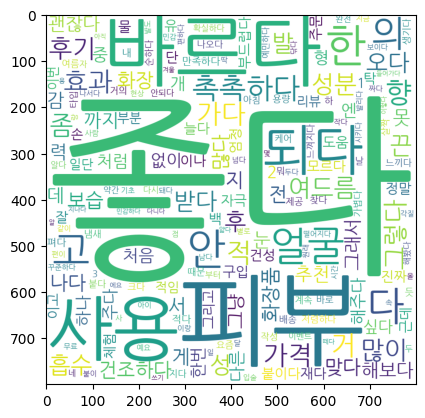

In [66]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',width=400, height=400, scale=2.0, max_font_size=250, background_color='white')
gen = wc.generate_from_frequencies(c1)
plt.figure()
plt.imshow(gen)

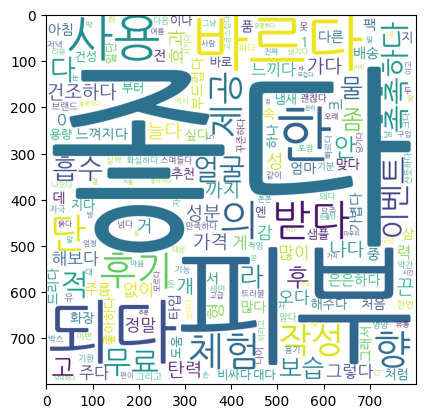

In [74]:
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',width=400, height=400, scale=2.0, max_font_size=250,background_color='white')
gen = wc.generate_from_frequencies(c2)
plt.figure()
plt.imshow(gen)

/usr/local/lib/python3.10/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


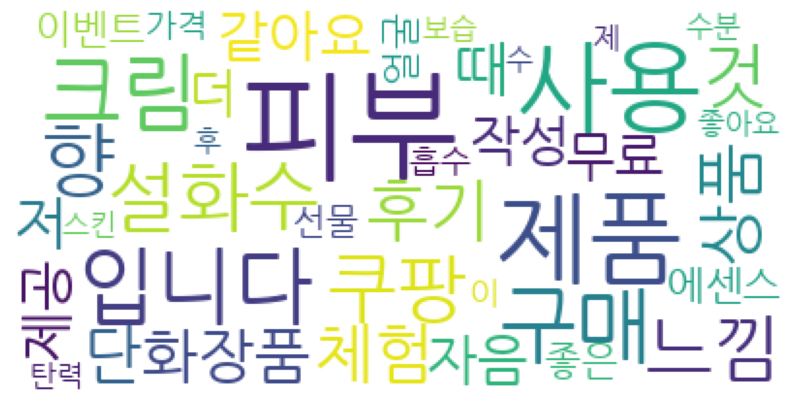

In [ ]:
from pickle import TUPLE1
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

twitter = Twitter()

# twitter함수를 통해 읽어들인 내용의 형태소를 분석한다.
sentences_tag = []
sentences_tag = twitter.pos(t1) 

noun_adj_list = []


# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()

In [ ]:
sentences_tag = []
sentences_tag = twitter.pos(t2) 

noun_adj_list = []


# tag가 명사이거나 형용사인 단어들만 noun_adj_list에 넣어준다.
for word, tag in sentences_tag:
    if tag in ['Noun' , 'Adjective']: 
        noun_adj_list.append(word)


# 가장 많이 나온 단어부터 40개를 저장한다.
counts = Counter(noun_adj_list)
tags = counts.most_common(40) 


# WordCloud를 생성한다.
# 한글을 분석하기위해 font를 한글로 지정해주어야 된다. macOS는 .otf , window는 .ttf 파일의 위치를
# 지정해준다. (ex. '/Font/GodoM.otf')
wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf',background_color="white", max_font_size=60)
cloud = wc.generate_from_frequencies(dict(tags))

plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()